In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent  # if notebook is in /notebooks
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("cwd:", Path.cwd())
print("project root:", PROJECT_ROOT)

cwd: /home/adonis320/workspace/thesis/socnavgym-exp/notebooks
project root: /home/adonis320/workspace/thesis/socnavgym-exp


In [2]:
import socnavgym
import gymnasium as gym
from socnavgym.wrappers import DiscreteActions
from socnavgym.wrappers import CardinalActions
from rl.QLearning import *
from rl.MSR_dec import *
from rl.SR import *
from rl.SF import *
from rl.DQN import *
from rl.MQL import *


from tqdm.auto import trange
import imageio
from utils.StateDiscretizer import *
from utils.TileCoder import *

/home/adonis320/miniconda3/envs/socnavgym/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
env = gym.make("SocNavGym-v1", config="../configs/no_humans.yaml") 
env = DiscreteActions(env)

#SEED = 5
EPISODES = 1000

In [4]:
#agent = DQN(features=219,
#        action_size=7,
#        learning_rate=0.00001,
#        gamma=0.99, epsilon=0.05, env=env
#    )
#
#rewards_dqn = []
#length_dqn = []
#
#for episode in trange(EPISODES):
#    obs = env.reset()
#    episodes_length, episodes_rewards = agent.act(env, obs)
#    length_dqn.append(episodes_length)
#    rewards_dqn.append(episodes_rewards)

In [5]:
#obs, _ = env.reset()
#frames = []
#for i in range(600):
#    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_features(obs)))
#    frame = env.render()
#    frames.append(frame)
#    if terminated or truncated:
#        break
#
#env.close()
#imageio.mimsave("videos/dqn_4_humans.gif", frames, fps=20)

In [6]:
discretizer = StateDiscretizer(xy_bins=30, env=env)


In [7]:
agent = SR(
        action_size=7,
        learning_rate=0.4,
        r_learning_rate=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
    )

rewards_sr = []
length_sr = []


env = gym.make("SocNavGym-v1", config="../configs/no_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(100):
    obs = env.reset()
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_sr.append(episodes_length)
    rewards_sr.append(episodes_rewards)

env = gym.make("SocNavGym-v1", config="../configs/4_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES-100):
    obs = env.reset()
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_sr.append(episodes_length)
    rewards_sr.append(episodes_rewards)

100%|██████████| 100/100 [00:23<00:00,  4.18it/s]
/home/adonis320/miniconda3/envs/socnavgym/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:54: UserWarning: WARN: A Box action space maximum and minimum values are equal.
  logger.warn("A Box action space maximum and minimum values are equal.")
100%|██████████| 900/900 [27:03<00:00,  1.80s/it]


In [8]:
obs, _ = env.reset()
frames = []
for i in range(600):
    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_state(obs)))
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        break

env.close()
imageio.mimsave("videos/sr_4_humans.gif", frames, fps=20)

QFontDatabase: Cannot find font directory /home/adonis320/miniconda3/envs/socnavgym/lib/python3.11/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/adonis320/miniconda3/envs/socnavgym/lib/python3.11/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/adonis320/miniconda3/envs/socnavgym/lib/python3.11/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconfig.
QFontDatabase: Cannot find font directory /home/adonis320/miniconda3/envs/socnavgym/lib/python3.11/site-packages/cv2/qt/fonts.
Note that Qt no longer ships fonts. Deploy some (from https://dejavu-fonts.github.io/ for example) or switch to fontconf

In [ ]:
agent = MSR(
        action_size=7,
        learning_rate_topo=0.2,
        learning_rate_social=0.2,
        r_learning_rate_topo=0.2,
        r_learning_rate_social=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
)
rewards_msr = []
length_msr = []


env = gym.make("SocNavGym-v1", config="../configs/no_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(100):
    obs = env.reset()
    episodes_length, episodes_rewards = agent.act(env, obs, upd_social=True)
    length_msr.append(episodes_length)
    rewards_msr.append(episodes_rewards)

env = gym.make("SocNavGym-v1", config="../configs/4_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES-100):
    obs = env.reset()
    episodes_length, episodes_rewards = agent.act(env, obs, upd_social=True)
    length_msr.append(episodes_length)
    rewards_msr.append(episodes_rewards)

100%|██████████| 900/900 [38:12<00:00,  2.55s/it]


In [10]:
obs, _ = env.reset()
frames = []
for i in range(600):
    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_state_key(obs)))
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        break

env.close()
imageio.mimsave("videos/msr_4_humans.gif", frames, fps=20)

In [ ]:
agent = MSR(
        action_size=7,
        learning_rate_topo=0.2,
        learning_rate_social=0.2,
        r_learning_rate_topo=0.2,
        r_learning_rate_social=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
)
rewards_msr_scratch = []
length_msr_scratch = []

env = gym.make("SocNavGym-v1", config="../configs/4_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES):
    obs = env.reset()
    episodes_length, episodes_rewards = agent.act(env, obs, upd_social=True)
    length_msr_scratch.append(episodes_length)
    rewards_msr_scratch.append(episodes_rewards)

100%|██████████| 1000/1000 [29:11<00:00,  1.75s/it]


In [12]:
agent = QL(
        action_size=7,
        learning_rate=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
)
rewards_ql = []
length_ql = []


env = gym.make("SocNavGym-v1", config="../configs/no_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(100):
    obs = env.reset()
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_ql.append(episodes_length)
    rewards_ql.append(episodes_rewards)

env = gym.make("SocNavGym-v1", config="../configs/4_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES-100):
    obs = env.reset()
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_ql.append(episodes_length)
    rewards_ql.append(episodes_rewards)

100%|██████████| 900/900 [27:47<00:00,  1.85s/it]


In [13]:
obs, _ = env.reset()
frames = []
for i in range(600):
    obs, reward, terminated, truncated, info = env.step(agent.sample_action(agent.get_state(obs)))
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        break

env.close()
imageio.mimsave("videos/ql_4_humans_transfer.gif", frames, fps=20)

In [14]:
agent = MQL(
        action_size=7,
        learning_rate=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
)
rewards_mql_scratch = []
length_mql_scratch = []

env = gym.make("SocNavGym-v1", config="../configs/4_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES):
    obs = env.reset()
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_mql_scratch.append(episodes_length)
    rewards_mql_scratch.append(episodes_rewards)

100%|██████████| 1000/1000 [33:51<00:00,  2.03s/it]


In [15]:
agent = QL(
        action_size=7,
        learning_rate=0.2,
        gamma=0.5, epsilon=0.05, discretizer=discretizer
)
rewards_ql_scratch = []
length_ql_scratch = []

env = gym.make("SocNavGym-v1", config="../configs/4_humans.yaml") 
env = DiscreteActions(env)
discretizer = StateDiscretizer(xy_bins=30, env=env)
agent.discretizer = discretizer

for episode in trange(EPISODES):
    obs = env.reset()
    episodes_length, episodes_rewards = agent.act(env, obs)
    length_ql_scratch.append(episodes_length)
    rewards_ql_scratch.append(episodes_rewards)

100%|██████████| 1000/1000 [32:52<00:00,  1.97s/it]


In [16]:
def rolling_avg(x, w=20):
        return np.convolve(x, np.ones(w) / w, mode='valid')

In [17]:
#length_rolling_dqn = rolling_avg(length_dqn)
#rewards_rolling_dqn = rolling_avg(rewards_dqn)
#
length_rolling_sr = rolling_avg(length_sr)
rewards_rolling_sr = rolling_avg(rewards_sr)

length_rolling_msr = rolling_avg(length_msr)
rewards_rolling_msr = rolling_avg(rewards_msr)

length_rolling_msr_scratch = rolling_avg(length_msr_scratch)
rewards_rolling_msr_scratch = rolling_avg(rewards_msr_scratch)

length_rolling_ql = rolling_avg(length_ql)
rewards_rolling_ql = rolling_avg(rewards_ql)

length_rolling_ql_scratch = rolling_avg(length_ql_scratch)
rewards_rolling_ql_scratch = rolling_avg(rewards_ql_scratch)

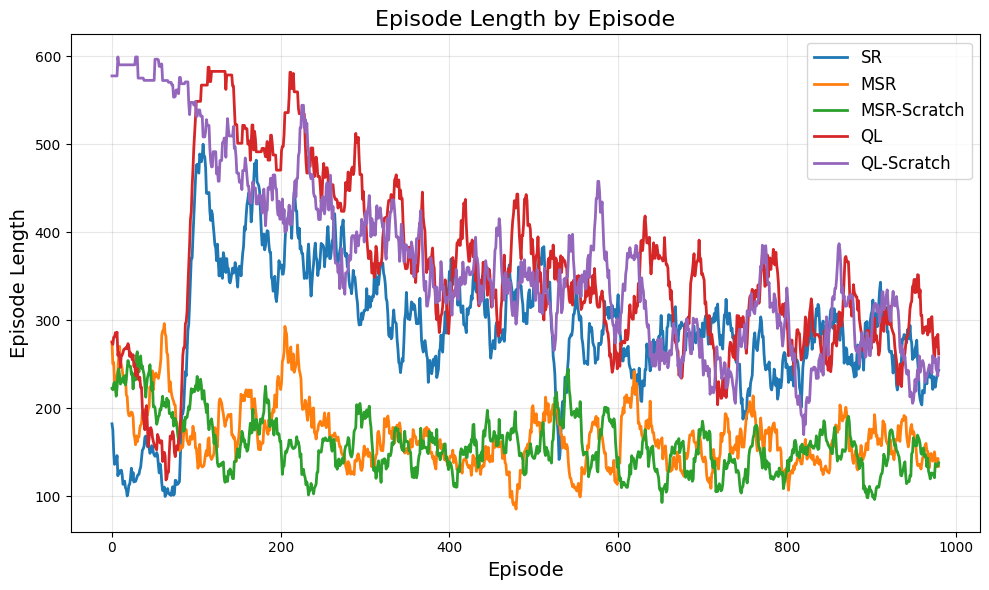

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

#ax.plot(length_rolling_dqn,  linewidth=2, label="DQN")
ax.plot(length_rolling_sr,  linewidth=2, label="SR")
ax.plot(length_rolling_msr,  linewidth=2, label="MSR")
ax.plot(length_rolling_msr_scratch,  linewidth=2, label="MSR-Scratch")
ax.plot(length_rolling_ql,  linewidth=2, label="QL")
ax.plot(length_rolling_ql_scratch,  linewidth=2, label="QL-Scratch")

ax.set_title("Episode Length by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Episode Length", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
from datetime import datetime

date_str = datetime.now().strftime("%Y-%m-%d")
fig.savefig(f"figs/length_{date_str}.png", bbox_inches="tight")
plt.show()


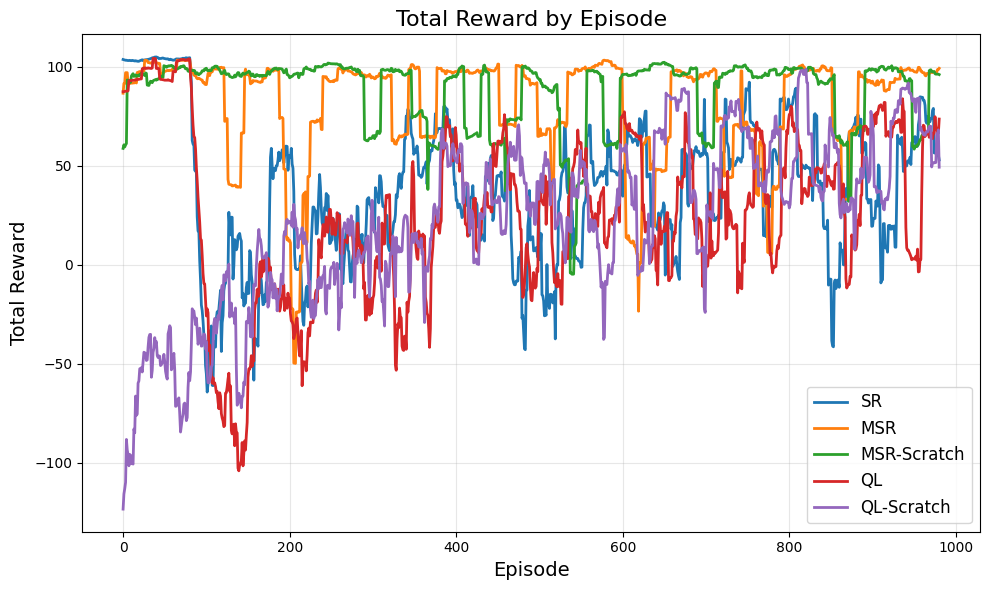

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

#ax.plot(rewards_rolling_dqn,  linewidth=2, label="DQN")
ax.plot(rewards_rolling_sr,  linewidth=2, label="SR")
ax.plot(rewards_rolling_msr,  linewidth=2, label="MSR")
ax.plot(rewards_rolling_msr_scratch,  linewidth=2, label="MSR-Scratch")
ax.plot(rewards_rolling_ql,  linewidth=2, label="QL")
ax.plot(rewards_rolling_ql_scratch,  linewidth=2, label="QL-Scratch")

ax.set_title("Total Reward by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Total Reward", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
from datetime import datetime

date_str = datetime.now().strftime("%Y-%m-%d")
fig.savefig(f"figs/reward_{date_str}.png", bbox_inches="tight")
plt.show()
